## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = '/Users/dana/Documents/Pew Research Reading Project'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all3years.pkl'))

In [5]:
df.shape

(5006, 23)

In [6]:
df.head()

,id,year,language,state,sex,age,marital,education,employment,hispanic,...,number_of_books_read,read_printed_books,read_audiobooks,read_e-books,income_estimate,reader_category,generation,reading_type,education_group,employed
0,1,2018,English,PA,Female,33,Living with a partner,High school graduate,Employed full-time,No,...,1,Yes,No,No,63829,Average reader,Millenials,Printed only,High school graduate,Employed
1,2,2018,English,SC,Female,76,Married,Do not know,Retired,No,...,5,Yes,No,No,35603,Average reader,Silent Gen,Printed only,Unknown,Not employed
2,3,2018,English,NJ,Female,24,Widowed,Associate degree,(VOL) Have own business/self-employed,No,...,0,No,No,No,30636,Non-reader,Millenials,Non-reader,College < 4yr degree,Employed
3,4,2018,English,MD,Female,60,Living with a partner,Associate degree,(VOL) Other,No,...,2,Yes,No,No,10057,Average reader,Boomers,Printed only,College < 4yr degree,Unknown
4,5,2018,English,NH,Male,55,Married,"Some college, no degree",Employed full-time,No,...,6,Yes,No,Yes,87803,Average reader,Gen X,Printed and e-books,College < 4yr degree,Employed


In [7]:
df.columns

Index(['id', 'year', 'language', 'state', 'sex', 'age', 'marital', 'education',
       'employment', 'hispanic', 'race', 'income', 'party',
       'number_of_books_read', 'read_printed_books', 'read_audiobooks',
       'read_e-books', 'income_estimate', 'reader_category', 'generation',
       'reading_type', 'education_group', 'employed'],
      dtype='object')

In [8]:
df['education_group'].value_counts()

College < 4yr degree     1303
College 4yr degree       1264
High school graduate     1111
College > 4yr degree      915
Less than high school     348
Unknown                    65
Name: education_group, dtype: int64

In [9]:
# assign numbers to education groups
df = df.replace({'education_group': {'Unknown': 0, 'Less than high school': 1, 'High school graduate': 2,
                               'College < 4yr degree': 3, 'College 4yr degree': 4, 'College > 4yr degree': 5}})

In [10]:
df['education_group'].value_counts()

3    1303
4    1264
2    1111
5     915
1     348
0      65
Name: education_group, dtype: int64

In [11]:
# create dummy variables for the book forms
dummies = pd.get_dummies(df[['read_printed_books','read_audiobooks','read_e-books']])
df = pd.concat([df, dummies], axis=1)

In [12]:
df.head()

,id,year,language,state,sex,age,marital,education,employment,hispanic,...,generation,reading_type,education_group,employed,read_printed_books_No,read_printed_books_Yes,read_audiobooks_No,read_audiobooks_Yes,read_e-books_No,read_e-books_Yes
0,1,2018,English,PA,Female,33,Living with a partner,High school graduate,Employed full-time,No,...,Millenials,Printed only,2,Employed,0,1,1,0,1,0
1,2,2018,English,SC,Female,76,Married,Do not know,Retired,No,...,Silent Gen,Printed only,0,Not employed,0,1,1,0,1,0
2,3,2018,English,NJ,Female,24,Widowed,Associate degree,(VOL) Have own business/self-employed,No,...,Millenials,Non-reader,3,Employed,1,0,1,0,1,0
3,4,2018,English,MD,Female,60,Living with a partner,Associate degree,(VOL) Other,No,...,Boomers,Printed only,3,Unknown,0,1,1,0,1,0
4,5,2018,English,NH,Male,55,Married,"Some college, no degree",Employed full-time,No,...,Gen X,Printed and e-books,3,Employed,0,1,1,0,0,1


In [13]:
df.columns

Index(['id', 'year', 'language', 'state', 'sex', 'age', 'marital', 'education',
       'employment', 'hispanic', 'race', 'income', 'party',
       'number_of_books_read', 'read_printed_books', 'read_audiobooks',
       'read_e-books', 'income_estimate', 'reader_category', 'generation',
       'reading_type', 'education_group', 'employed', 'read_printed_books_No',
       'read_printed_books_Yes', 'read_audiobooks_No', 'read_audiobooks_Yes',
       'read_e-books_No', 'read_e-books_Yes'],
      dtype='object')

In [14]:
# keep only the ones I need
df = df[['number_of_books_read','education_group',
        'read_printed_books_Yes','read_audiobooks_Yes','read_e-books_Yes']]

In [15]:
# rename columns
df.rename(columns={'read_printed_books_Yes':'read printed books','read_audiobooks_Yes':'read audiobooks',
                   'read_e-books_Yes':'read e-books'}, inplace=True)

In [16]:
df.head()

,number_of_books_read,education_group,read printed books,read audiobooks,read e-books
0,1,2,1,0,0
1,5,0,1,0,0
2,0,3,0,0,0
3,2,3,1,0,0
4,6,3,1,0,1


In [17]:
# remove outliers
df = df.loc[df['number_of_books_read'] < 60]

In [18]:
df.shape

(4711, 5)

In [19]:
# normalize the data

# copy the data
df = df.copy()
  
# apply normalization techniques
for column in df.columns:
    df[column] = df[column]  / df[column].abs().max()
      
# view normalized data
display(df)

,number_of_books_read,education_group,read printed books,read audiobooks,read e-books
0,0.018182,0.4,1.0,0.0,0.0
1,0.090909,0.0,1.0,0.0,0.0
2,0.000000,0.6,0.0,0.0,0.0
3,0.036364,0.6,1.0,0.0,0.0
4,0.109091,0.6,1.0,0.0,1.0
...,...,...,...,...,...
1497,0.090909,0.6,1.0,1.0,0.0
1498,0.054545,0.6,1.0,0.0,1.0
1499,0.036364,0.4,1.0,1.0,0.0
1500,0.018182,0.4,1.0,0.0,0.0


### 2. The elbow technique

In [20]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [21]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-3212.539711699888,
 -2090.4436027100905,
 -1329.159285127227,
 -928.5237856144707,
 -689.9523809394791,
 -543.5065238511419,
 -452.4160594495557,
 -381.5623840850309,
 -336.5762468807273]

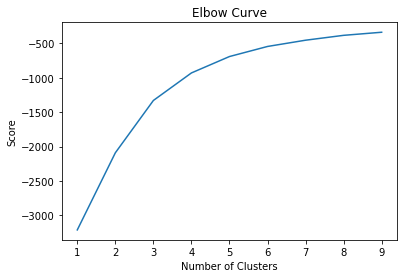

In [22]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [23]:
# try silhouette score method

import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,10):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.41977234458495866
Silhouette score for k(clusters) = 3 is 0.5031388939539923
Silhouette score for k(clusters) = 4 is 0.5660775274847846
Silhouette score for k(clusters) = 5 is 0.6226198739644654
Silhouette score for k(clusters) = 6 is 0.6466274598721656
Silhouette score for k(clusters) = 7 is 0.6689511239734036
Silhouette score for k(clusters) = 8 is 0.5822631237519018
Silhouette score for k(clusters) = 9 is 0.5972322645943625


In [24]:
# 7 is best

### 3. k-means clustering

In [25]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 7) 


In [26]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=7)

In [27]:
df['clusters'] = kmeans.fit_predict(df)

In [28]:
df.head()

,number_of_books_read,education_group,read printed books,read audiobooks,read e-books,clusters
0,0.018182,0.4,1.0,0.0,0.0,0
1,0.090909,0.0,1.0,0.0,0.0,0
2,0.000000,0.6,0.0,0.0,0.0,1
3,0.036364,0.6,1.0,0.0,0.0,0
4,0.109091,0.6,1.0,0.0,1.0,5


In [29]:
df['clusters'].value_counts()

0    1780
1    1164
5     642
4     399
2     379
6     183
3     164
Name: clusters, dtype: int64

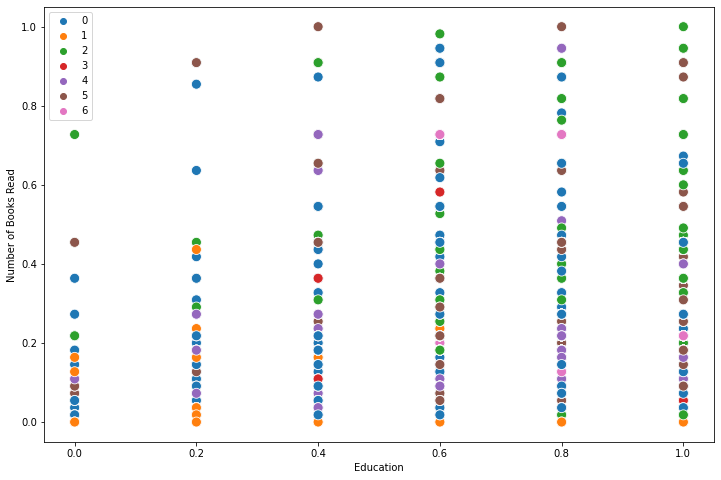

In [30]:
# Plot the clusters for education and number of books

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['education_group'], y=df['number_of_books_read'], hue=kmeans.labels_, s=100, 
                     palette='tab10') 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Education') # Label x-axis.
plt.ylabel('Number of Books Read') # Label y-axis.
plt.show()

In [35]:
df.loc[df['clusters'] == 0, 'cluster'] = 'blue'
df.loc[df['clusters'] == 1, 'cluster'] = 'orange'
df.loc[df['clusters'] == 2, 'cluster'] = 'green'
df.loc[df['clusters'] == 3, 'cluster'] = 'red'
df.loc[df['clusters'] == 4, 'cluster'] = 'purple'
df.loc[df['clusters'] == 5, 'cluster'] = 'brown'
df.loc[df['clusters'] == 6, 'cluster'] = 'pink'

<AxesSubplot:xlabel='education_group', ylabel='number_of_books_read'>

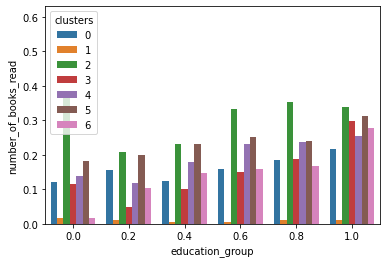

In [36]:
sns.barplot(x=df['education_group'],y=df['number_of_books_read'],hue=df['clusters'],errwidth=0,palette='tab10')

In [37]:
df.groupby('cluster').agg({'read e-books':['mean', 'median'], 
                           'read printed books':['mean', 'median'],
                           'read audiobooks':['mean', 'median'],
                         'education_group':['mean', 'median'], 
                         'number_of_books_read':['mean', 'median']})

read e-books        read printed books        read audiobooks         \
                mean median               mean median            mean median   
cluster                                                                        
blue        0.000000    0.0                1.0    1.0             0.0    0.0   
brown       1.000000    1.0                1.0    1.0             0.0    0.0   
green       1.000000    1.0                1.0    1.0             1.0    1.0   
orange      0.000000    0.0                0.0    0.0             0.0    0.0   
pink        0.431694    0.0                0.0    0.0             1.0    1.0   
purple      0.000000    0.0                1.0    1.0             1.0    1.0   
red         1.000000    1.0                0.0    0.0             0.0    0.0   

        education_group        number_of_books_read            
                   mean median                 mean    median  
cluster                                                        
blue           0.654719    0.6             0.167160  0.090909  
brown          0.746729    0.8             0.262673  0.181818  
green          0.769921    0.8             0.329336  0.272727  
orange         0.488488    0.4             0.008060  0.000000  
pink           0.676503    0.6             0.177844  0.090909  
purple         0.696742    0.8             0.223650  0.163636  
red            0.673171    0.6             0.174945  0.090909

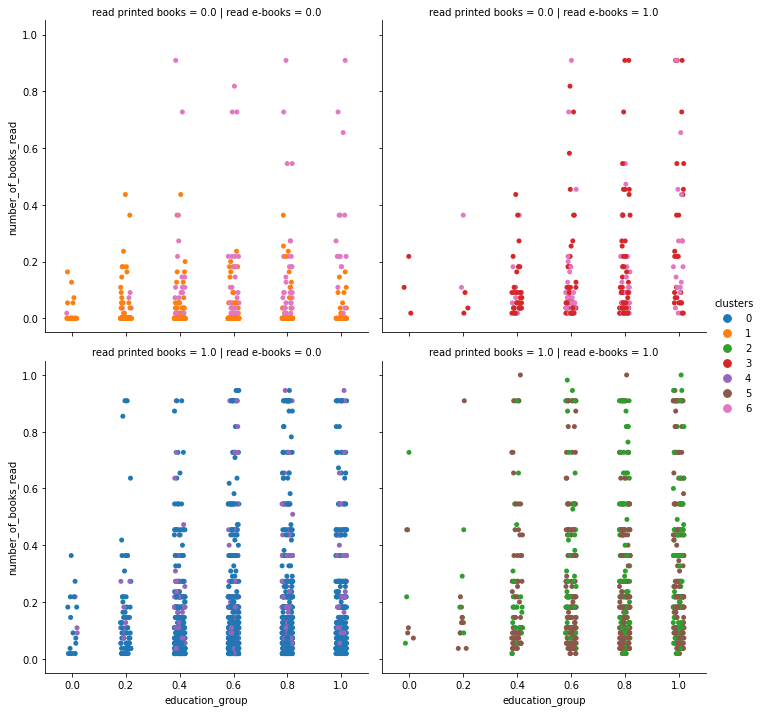

In [34]:
sns.catplot(
    data=df, x="education_group", y="number_of_books_read",hue='clusters',
     col="read e-books",palette='tab10',row='read printed books'
)